                                                         Experiment-1
Objective : Demonstrate the process of building and evaluating a decision tree classifier using the scikit-learn library on the music dataset. The notebook includes steps such as:
1. Loading and exploring the dataset.
2. Preprocessing the data (splitting features and target).
3. Splitting the data into training and test sets.
4. Training a Decision Tree Classifier.
5. Making predictions and evaluating the model.
6. Visualizing the decision tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_music = pd.read_excel('Music.xlsx')
df_music.head()

,Age,Gender,Genre
0,20,0,Rock
1,22,0,Rock
2,24,0,Rock
3,26,0,Rock
4,27,0,JAZZ


In [9]:
X = df_music.drop('Genre',axis=1)
y = df_music['Genre']

In [10]:
X.shape,y.shape

((24, 2), (24,))

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [12]:
X_train.shape,y_train.shape

((19, 2), (19,))

In [13]:
X_test.shape,y_test.shape

((5, 2), (5,))

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
prediction = model.predict([[23,0]])
print(f'Prediction is:{prediction}')

Prediction is:['Rock']


C:\Users\khana\miniconda3\envs\ML_LAB_2025\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
X_test.values

array([[35,  1],
       [45,  0],
       [40,  1],
       [31,  1],
       [35,  0]])

In [20]:
predictions = model.predict(X_test)
print(f'Model predictions was:{predictions}')

Model predictions was:['CLASSICAL' 'CLASSICAL' 'CLASSICAL' 'JAZZ' 'CLASSICAL']


In [21]:
y_test

19         JAZZ
10    CLASSICAL
21    CLASSICAL
18         JAZZ
7          JAZZ
Name: Genre, dtype: object

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='my_decision_tree.dot',feature_names=['Age','Gender'],
               class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

In [23]:
import pydotplus as pydot
decision_tree = pydot.graph_from_dot_file('my_decision_tree.dot')

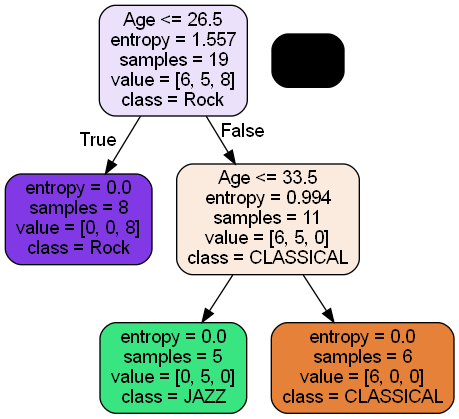

In [25]:
from IPython.display import Image
Image(decision_tree.create_png())